In [59]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [60]:
df=pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [61]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

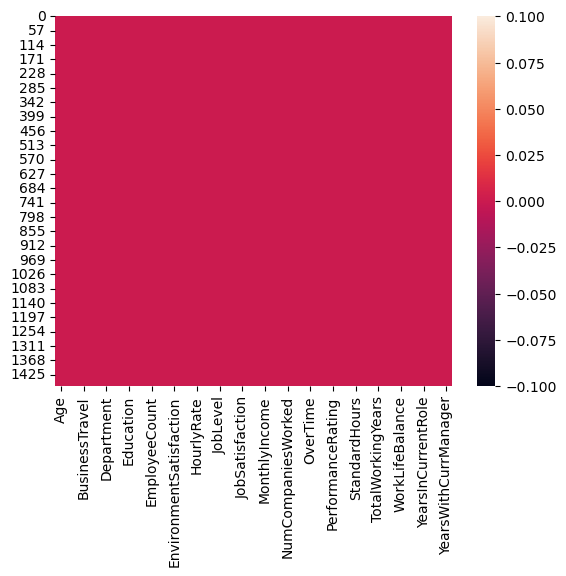

In [62]:
#visualizing the null values
sns.heatmap(df.isnull())

There are no null values in the dataset.

In [63]:
#checking duplicate values
df.duplicated().sum()

0

There is no duplicacy of data in the dataset.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [65]:
#checking the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [66]:
#Dropping un-necessary columns
df.drop(['Age','NumCompaniesWorked','TotalWorkingYears','EmployeeCount','StandardHours','Over18'],inplace=True,axis=1)

In [67]:
#separating cat_col and num_col
cat_col=[]
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
    elif df.dtypes[i]!="object":
        num_col.append(i)
    else:
        print("error")
print("Categorical Column\n",cat_col,"\n")
print("Numerical Column\n",num_col,"\n")

Categorical Column
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'] 

Numerical Column
 ['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 



In [68]:
#Description
df.describe()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,15.209524,3.153741,2.712245,0.793878,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,3.659938,0.360824,1.081209,0.852077,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,12.000000,3.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,14.000000,3.000000,3.000000,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,18.000000,3.000000,4.000000,1.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,25.000000,4.000000,4.000000,3.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here we can see that there is skewness present in the dataset and also little outliers present.
Here we can also see the std of Employee Count in 0, which means there is no analysis for this columns, we will drop this column later on.

In [69]:
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


Here we can see the unique value of over18 is 1, which refers there is no analysis in this column, so its better to remove this column.

# Exploratory Data Analysis

# Uni-Variate Analysis

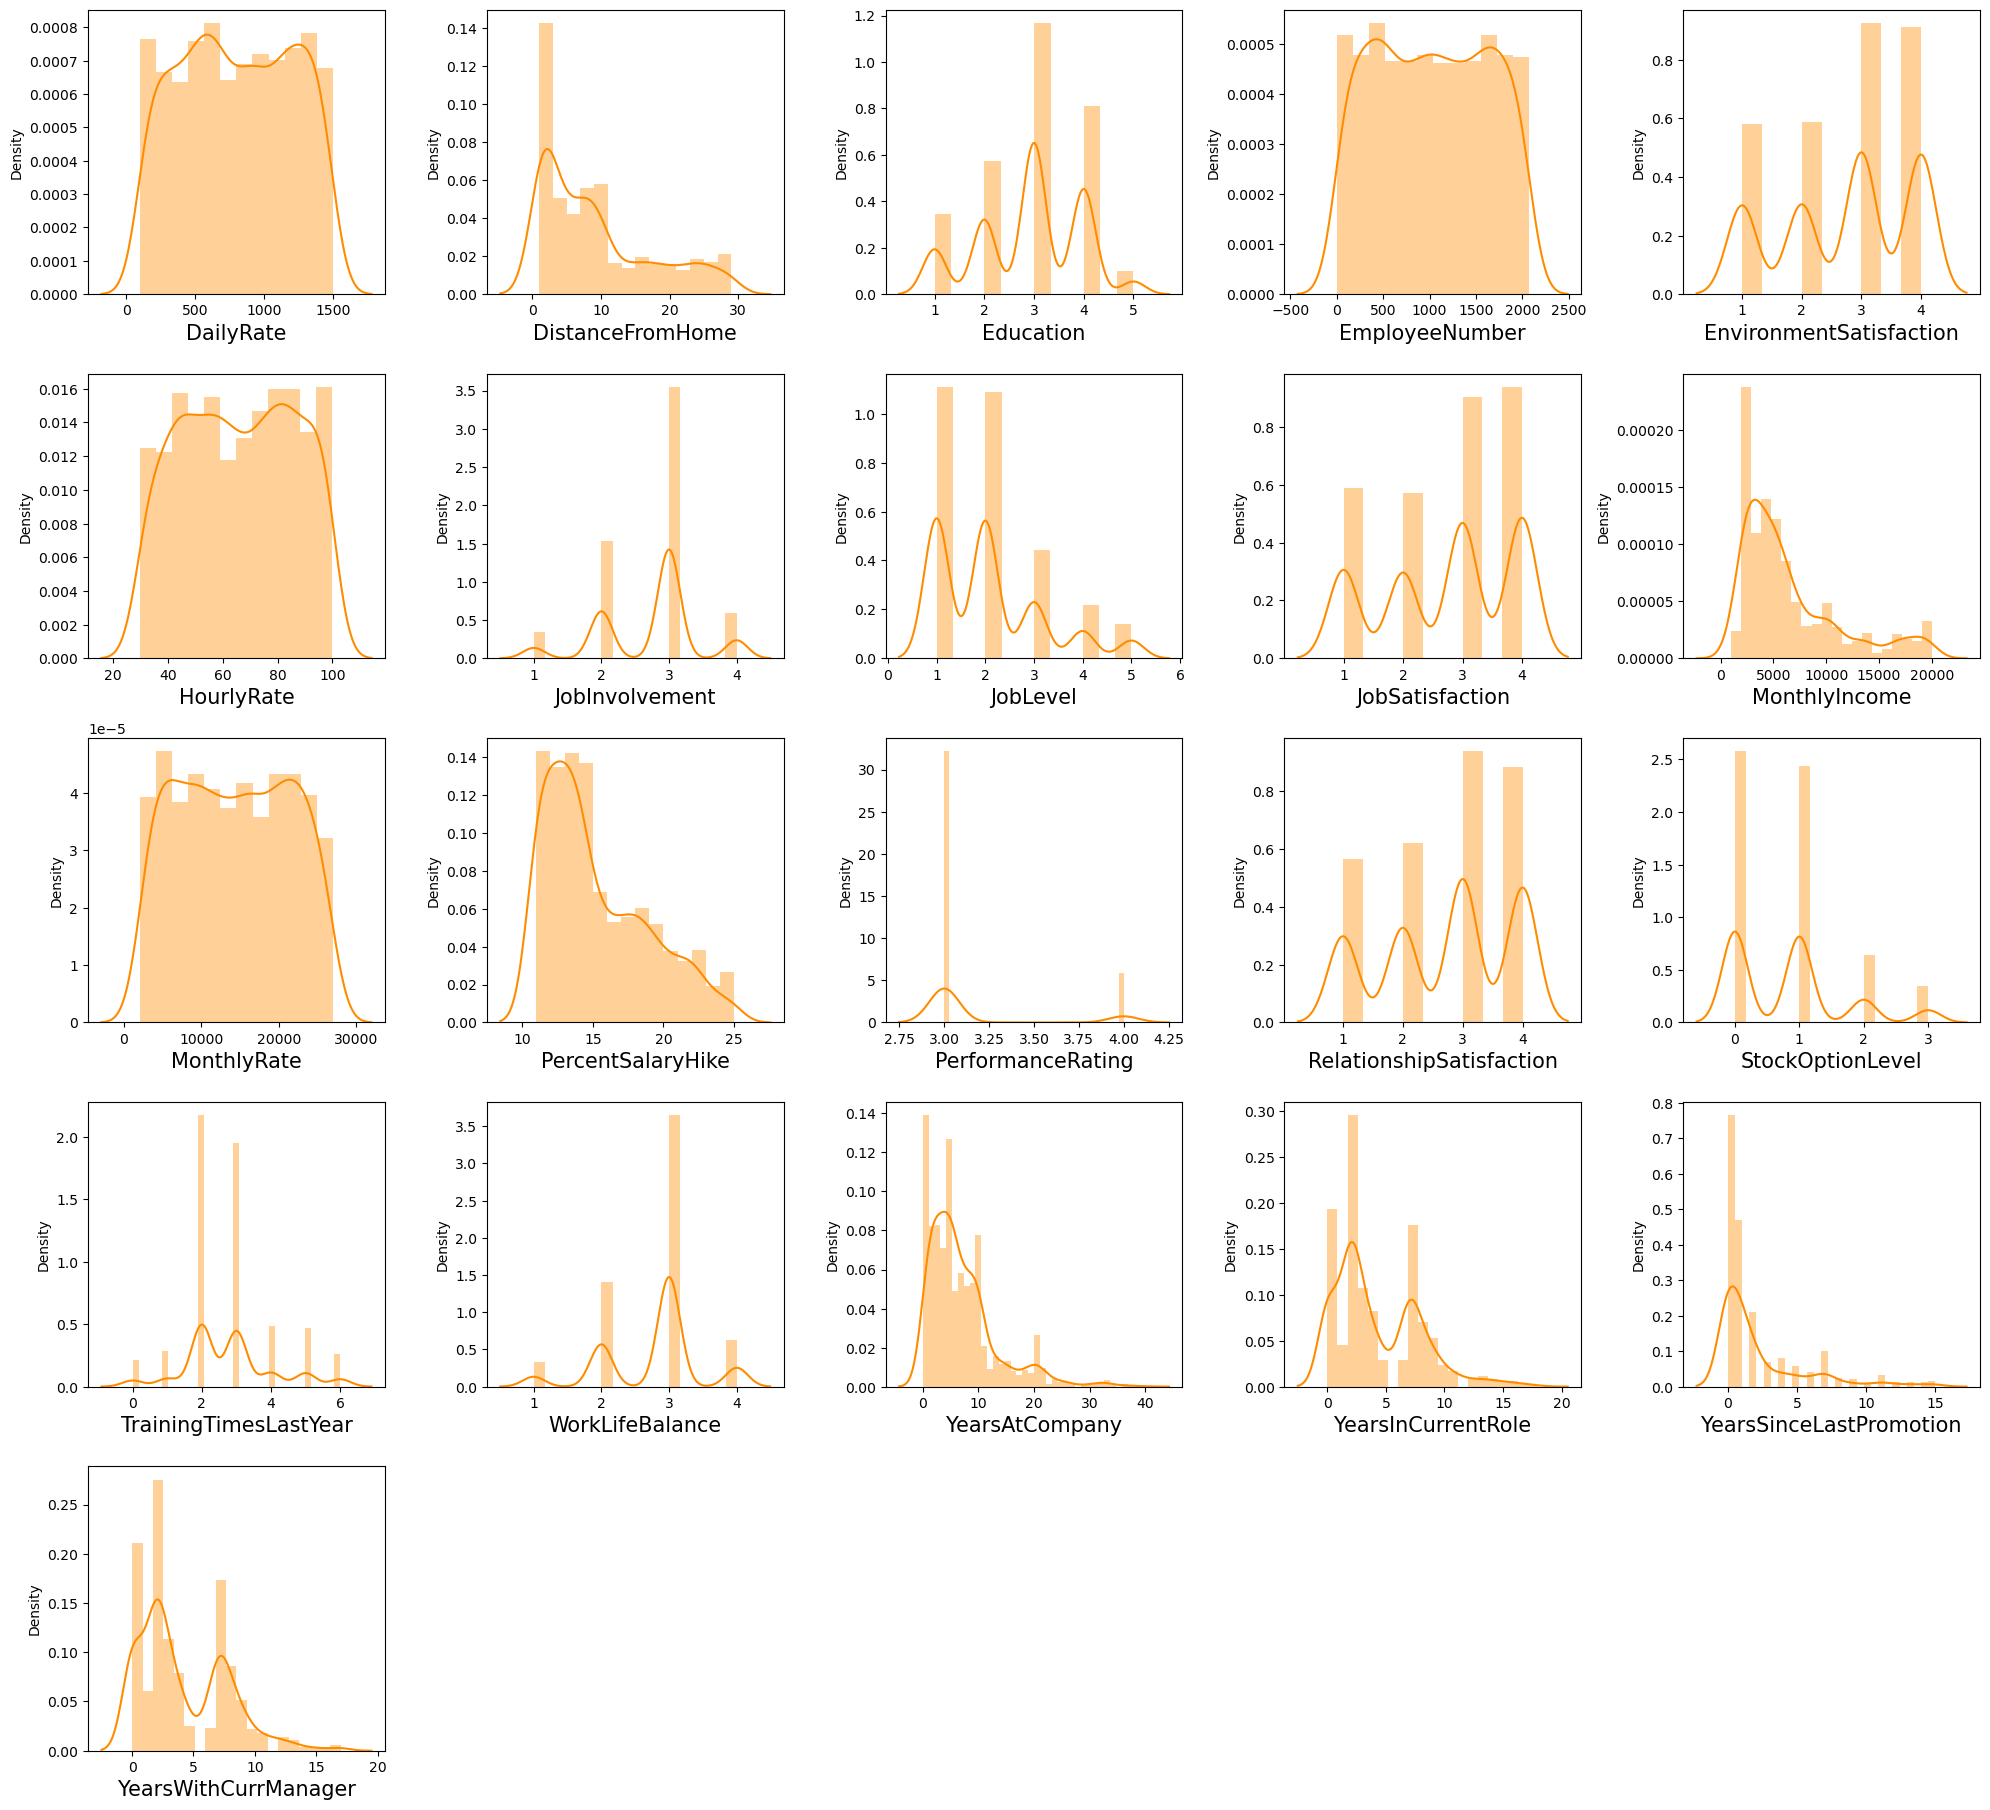

In [70]:
plt.figure(figsize=(20,25))
plt_no=1
for i in num_col:
    if plt_no<=35:
        plt.subplot(7,5,plt_no)
        sns.distplot(df[i],color='darkorange')
        plt.xlabel(i,fontsize=15)
    plt_no+=1
plt.tight_layout()

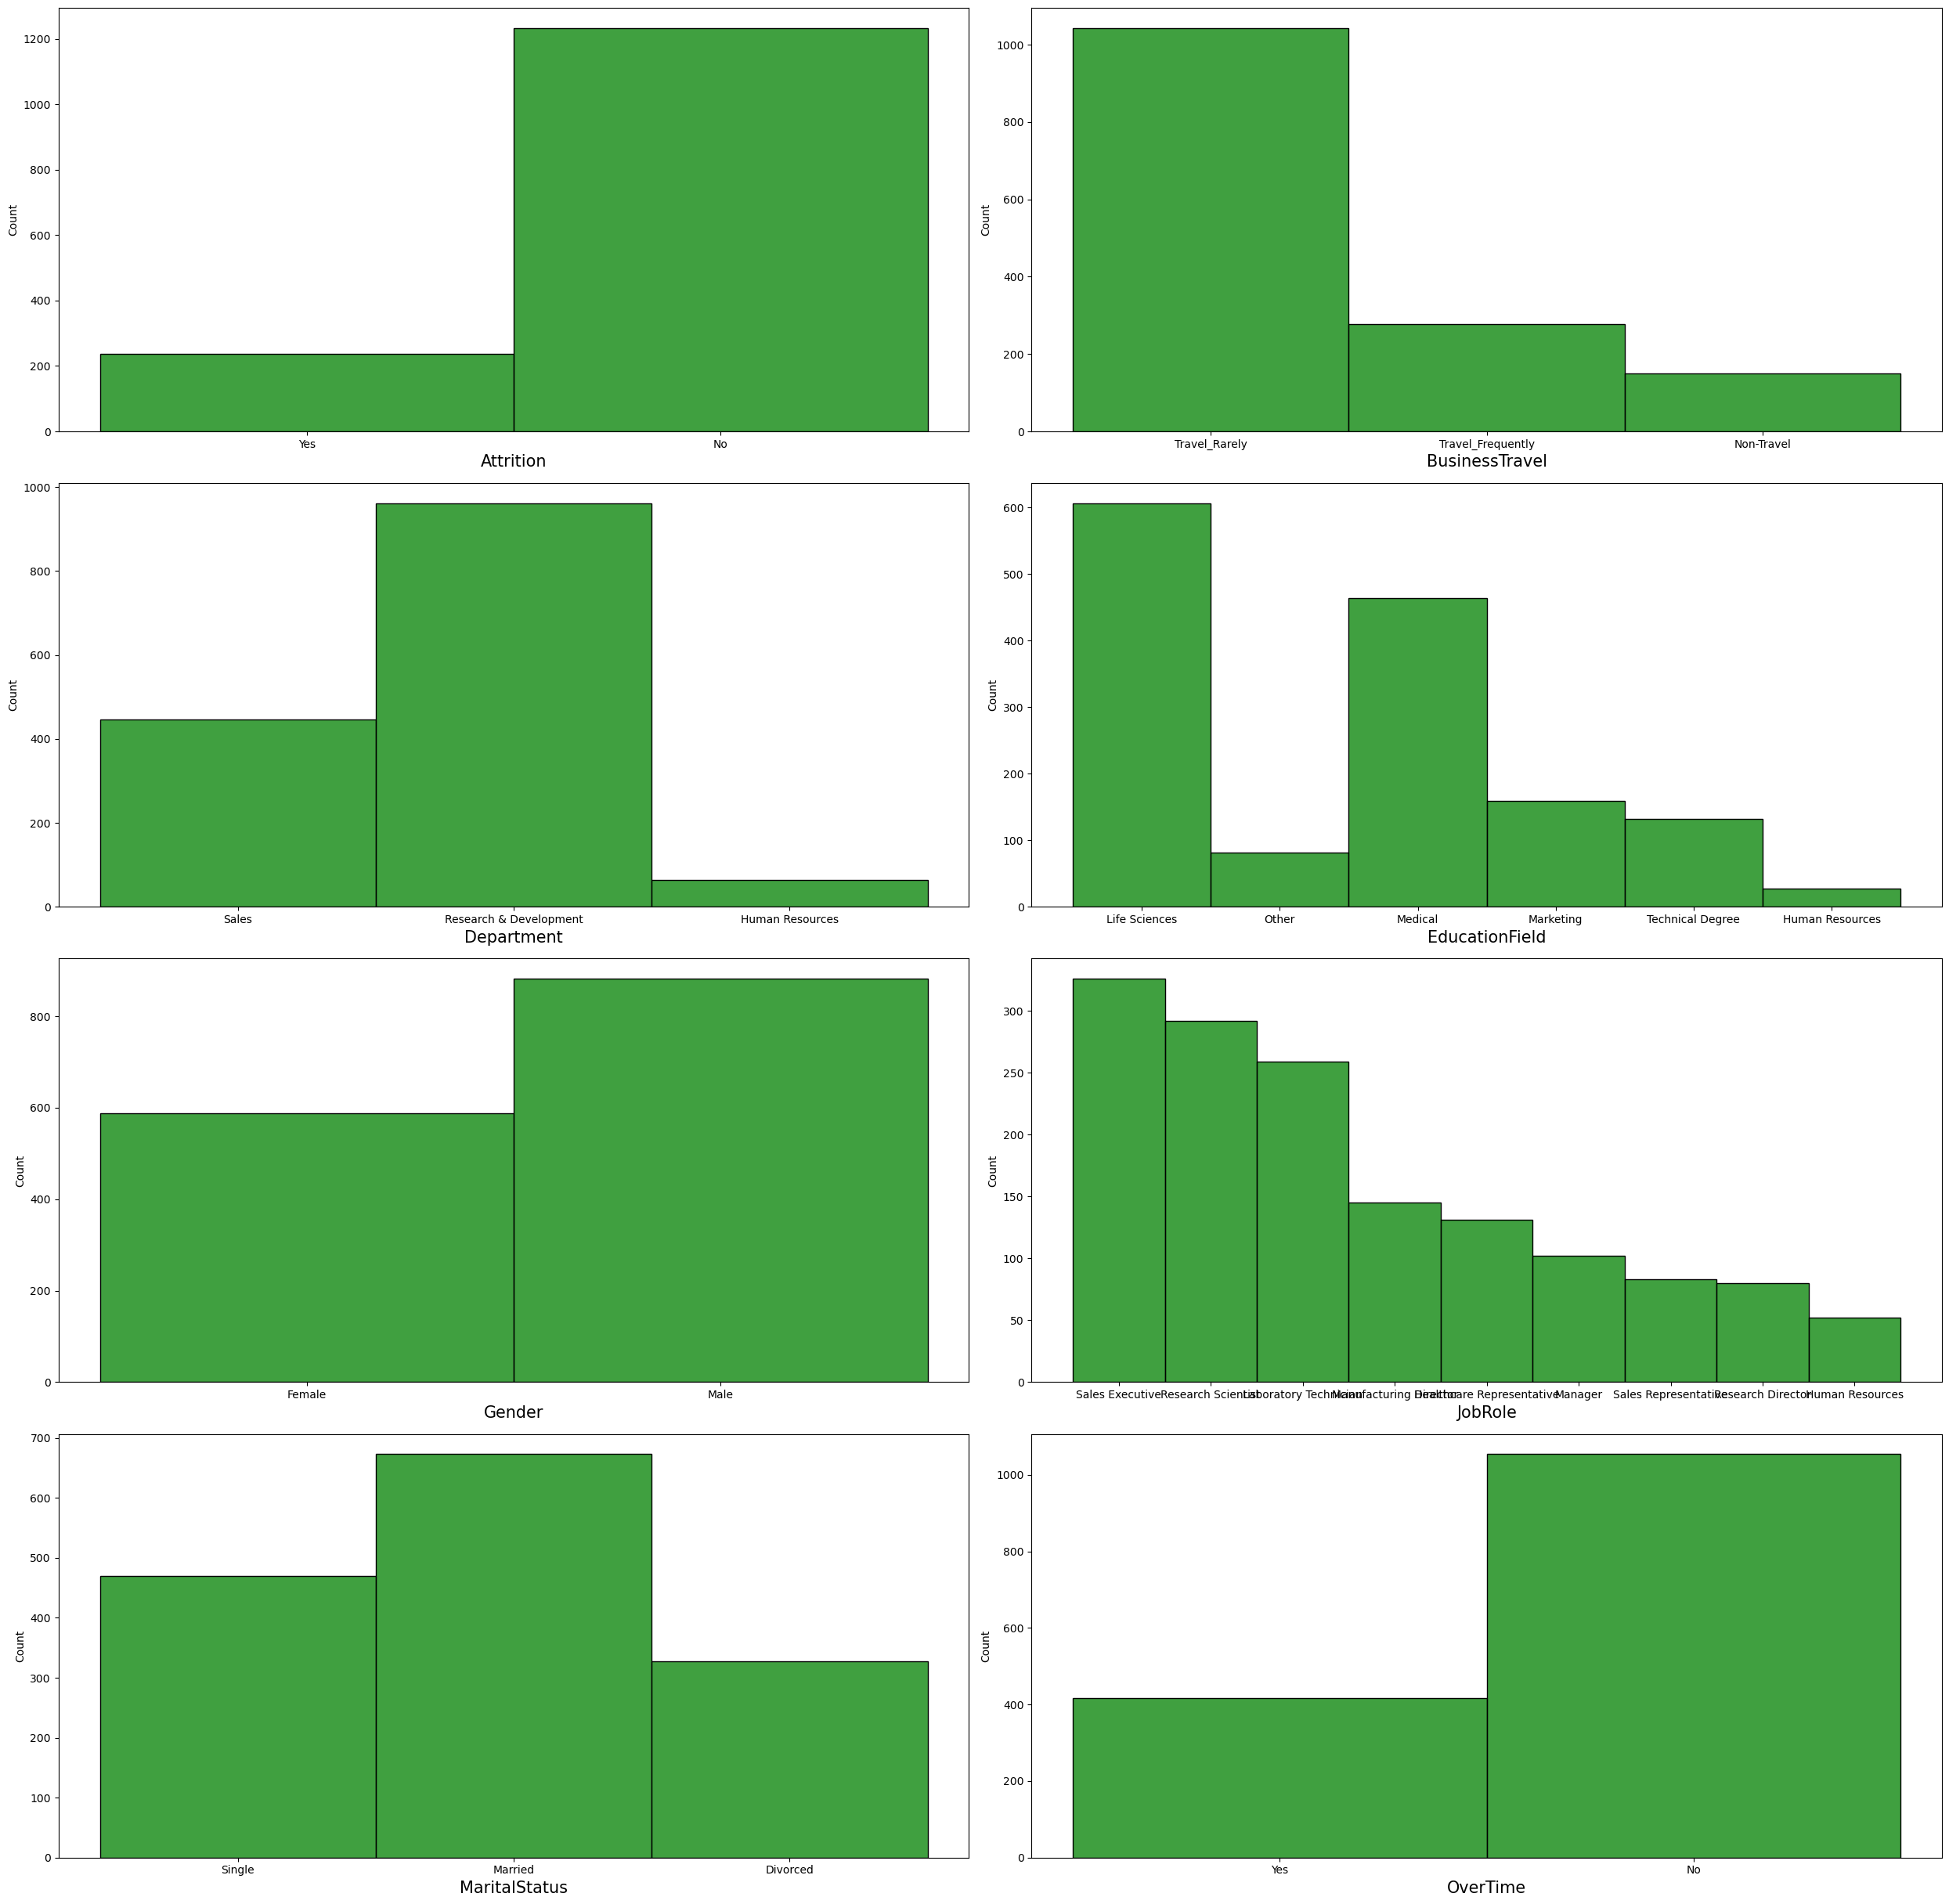

In [71]:
plt.figure(figsize=(25,30))
p=1
for i in cat_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.histplot(df[i],color='green')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

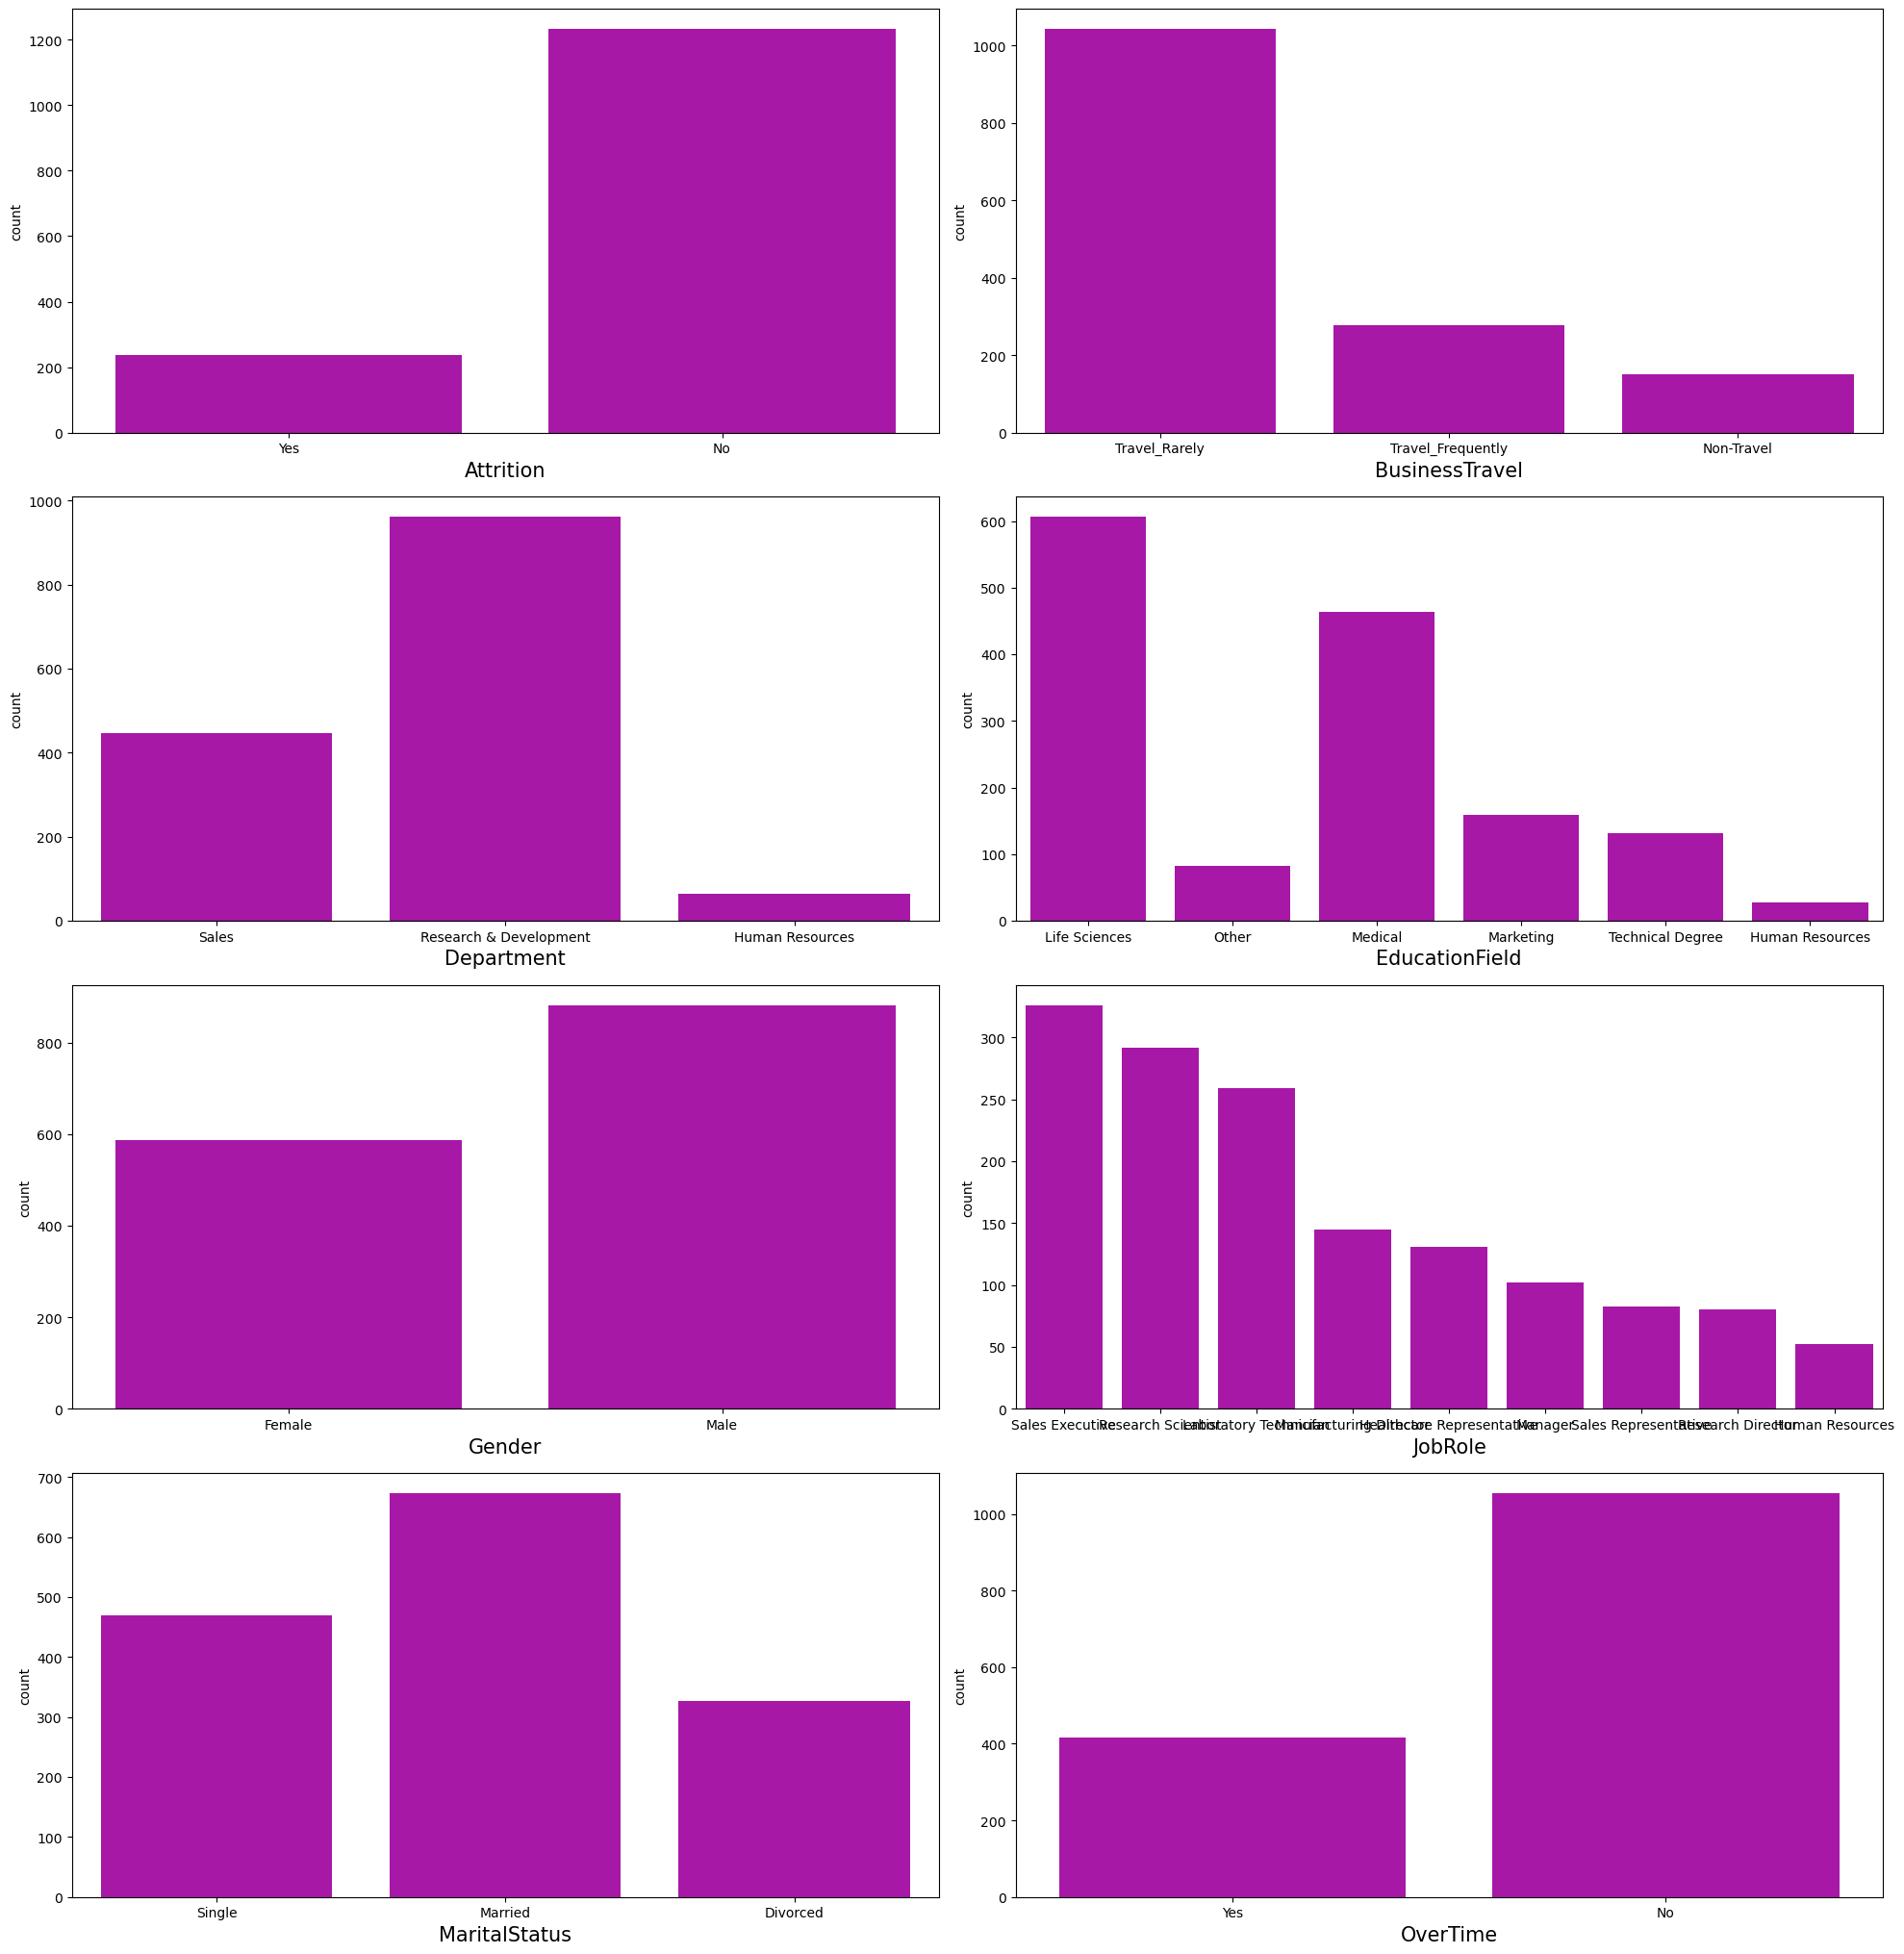

In [72]:
plt.figure(figsize=(20,25))
p=1
for i in cat_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.countplot(df[i],color='m')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

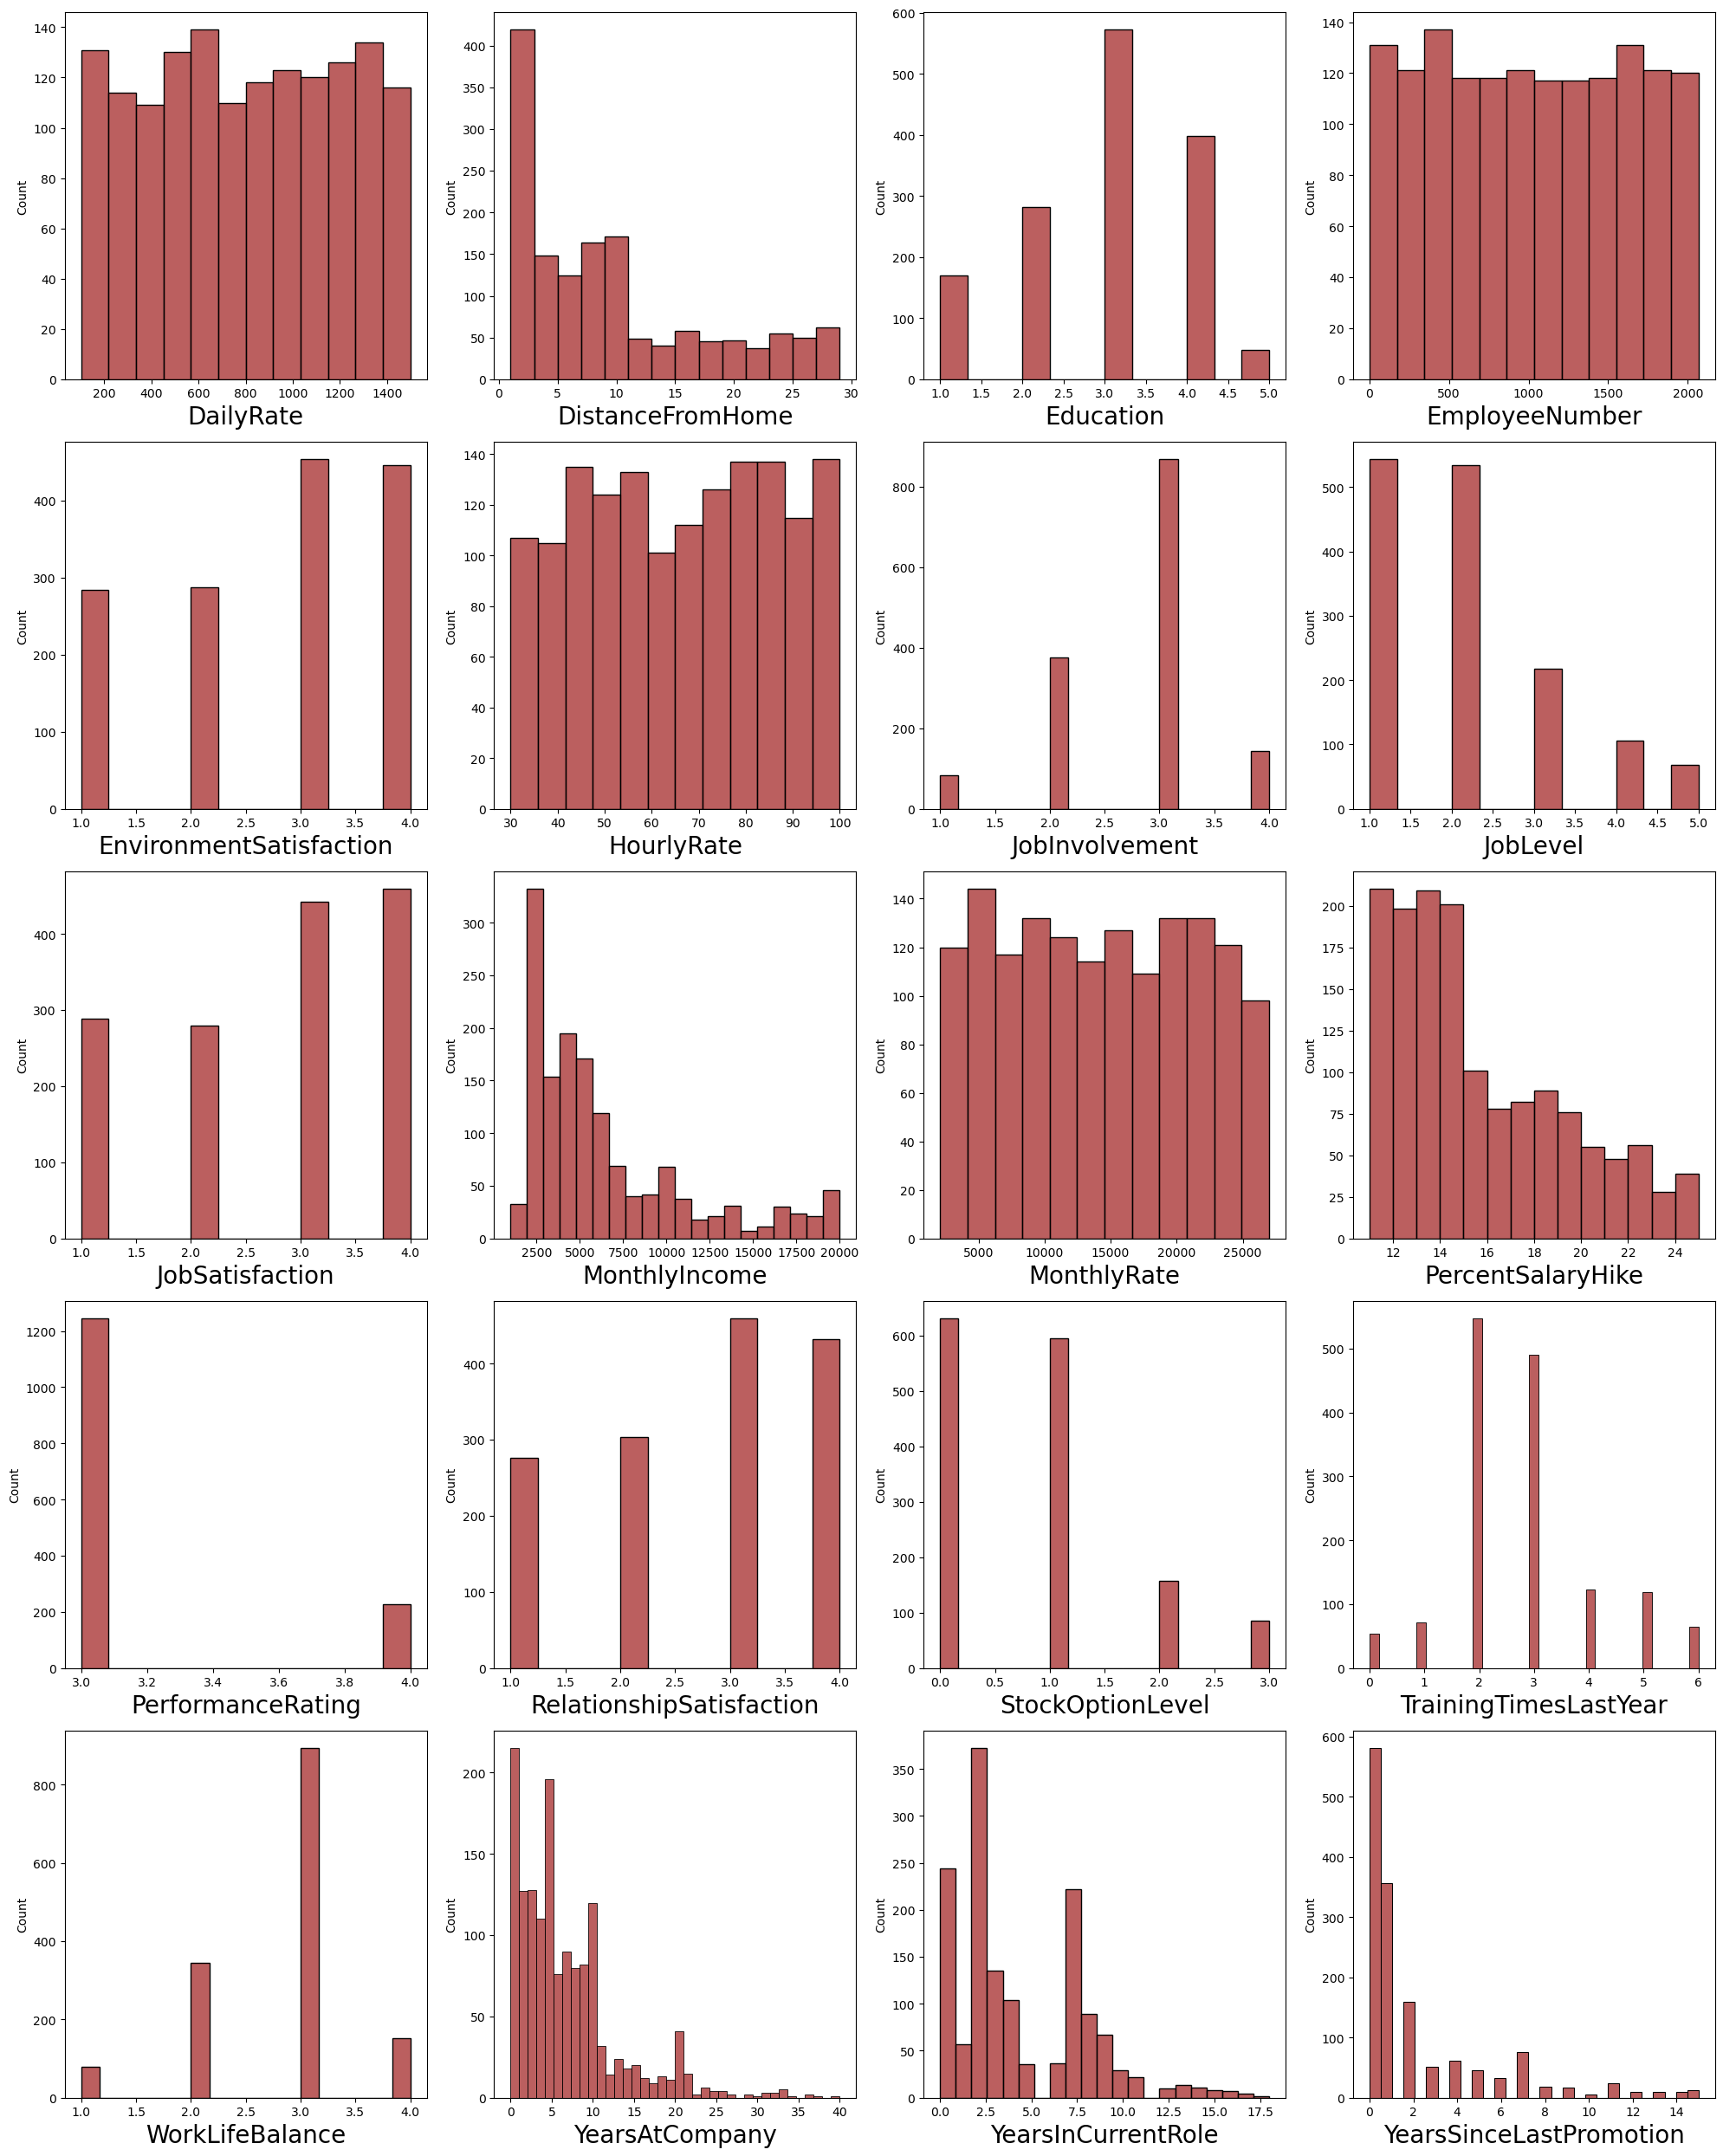

In [73]:
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=20:
        plt.subplot(5,4,p)
        sns.histplot(df[i],color='brown')
        plt.xlabel(i,fontsize=20)
    p+=1
plt.tight_layout()

# Bi-Variate Analysis

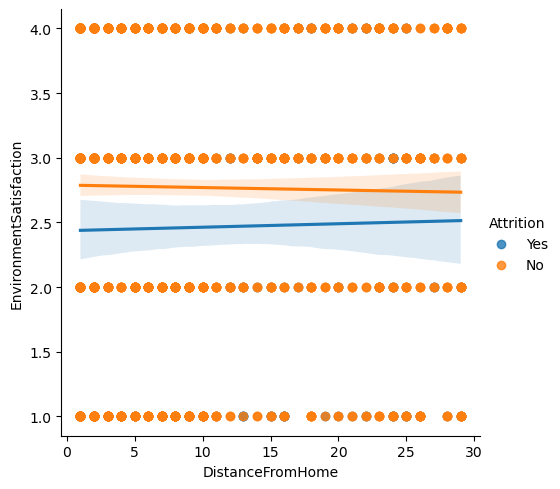

In [74]:
sns.lmplot(data=df,x='DistanceFromHome',y='EnvironmentSatisfaction',hue='Attrition')

<AxesSubplot:xlabel='HourlyRate', ylabel='JobInvolvement'>

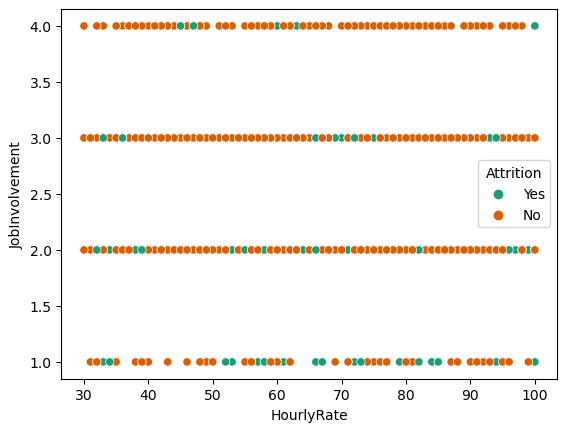

In [75]:
sns.scatterplot(data=df,x='HourlyRate',y='JobInvolvement',hue='Attrition',palette='Dark2')

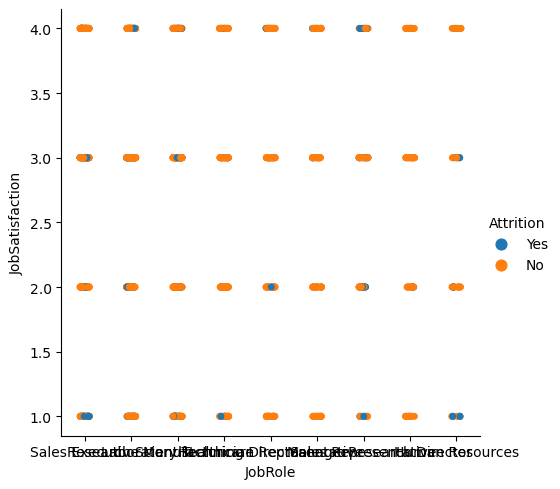

In [76]:
sns.catplot(data=df,x='JobRole',y='JobSatisfaction',hue='Attrition')

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='YearsSinceLastPromotion'>

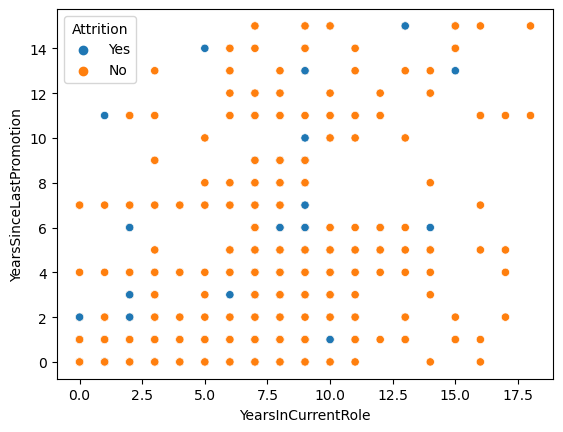

In [77]:
sns.scatterplot(data=df,x='YearsInCurrentRole',y='YearsSinceLastPromotion',hue='Attrition')

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

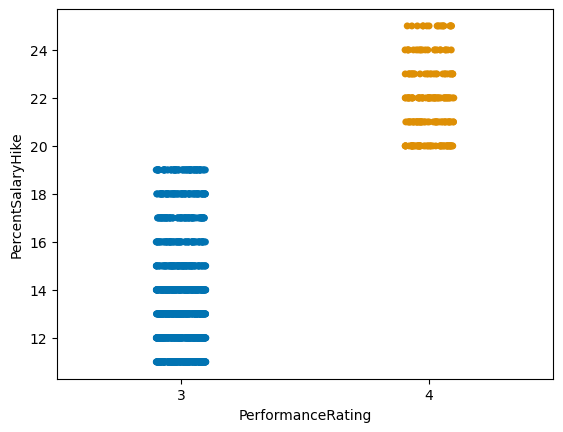

In [78]:
sns.stripplot(data=df,x='PerformanceRating',y='PercentSalaryHike',palette='colorblind')

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Attrition'>

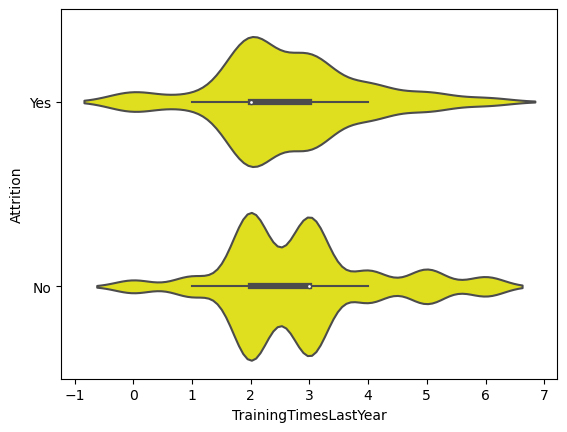

In [79]:
sns.violinplot(data=df,x='TrainingTimesLastYear',y='Attrition',color='Yellow')

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Attrition'>

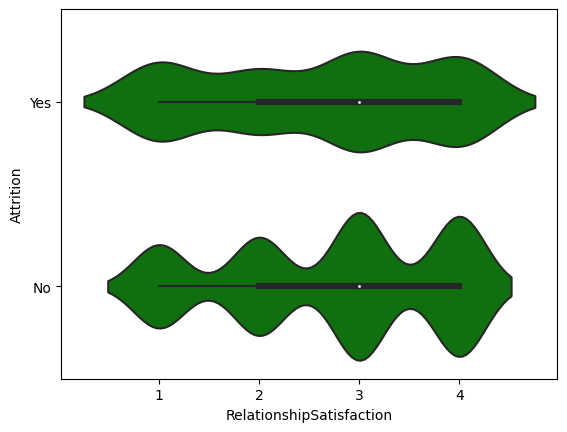

In [80]:
sns.violinplot(data=df,x='RelationshipSatisfaction',y='Attrition',color='green')

<AxesSubplot:xlabel='JobLevel', ylabel='JobRole'>

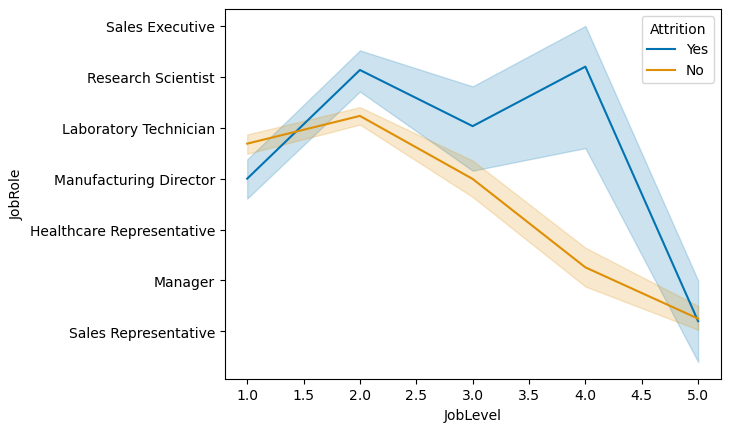

In [81]:
sns.lineplot(data=df,x='JobLevel',y='JobRole',hue='Attrition',palette='colorblind')

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

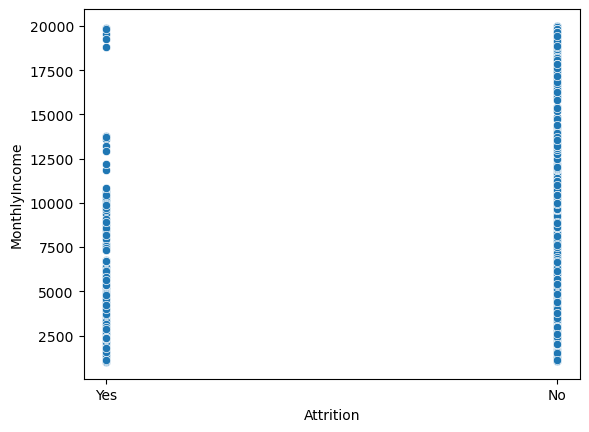

In [82]:
sns.scatterplot(data=df,x='Attrition',y='MonthlyIncome',palette='tab10')

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='YearsSinceLastPromotion'>

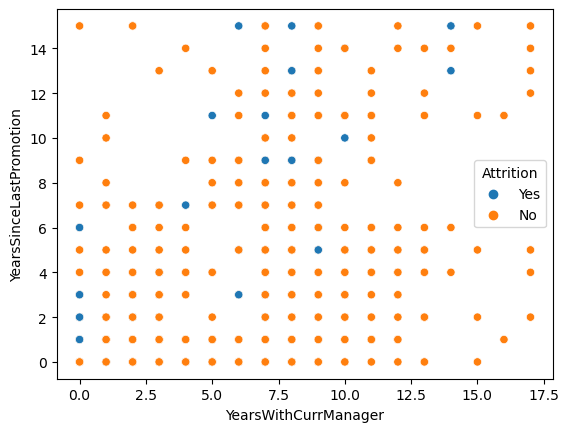

In [83]:
sns.scatterplot(data=df,x='YearsWithCurrManager',y='YearsSinceLastPromotion',hue='Attrition')

# Outliers

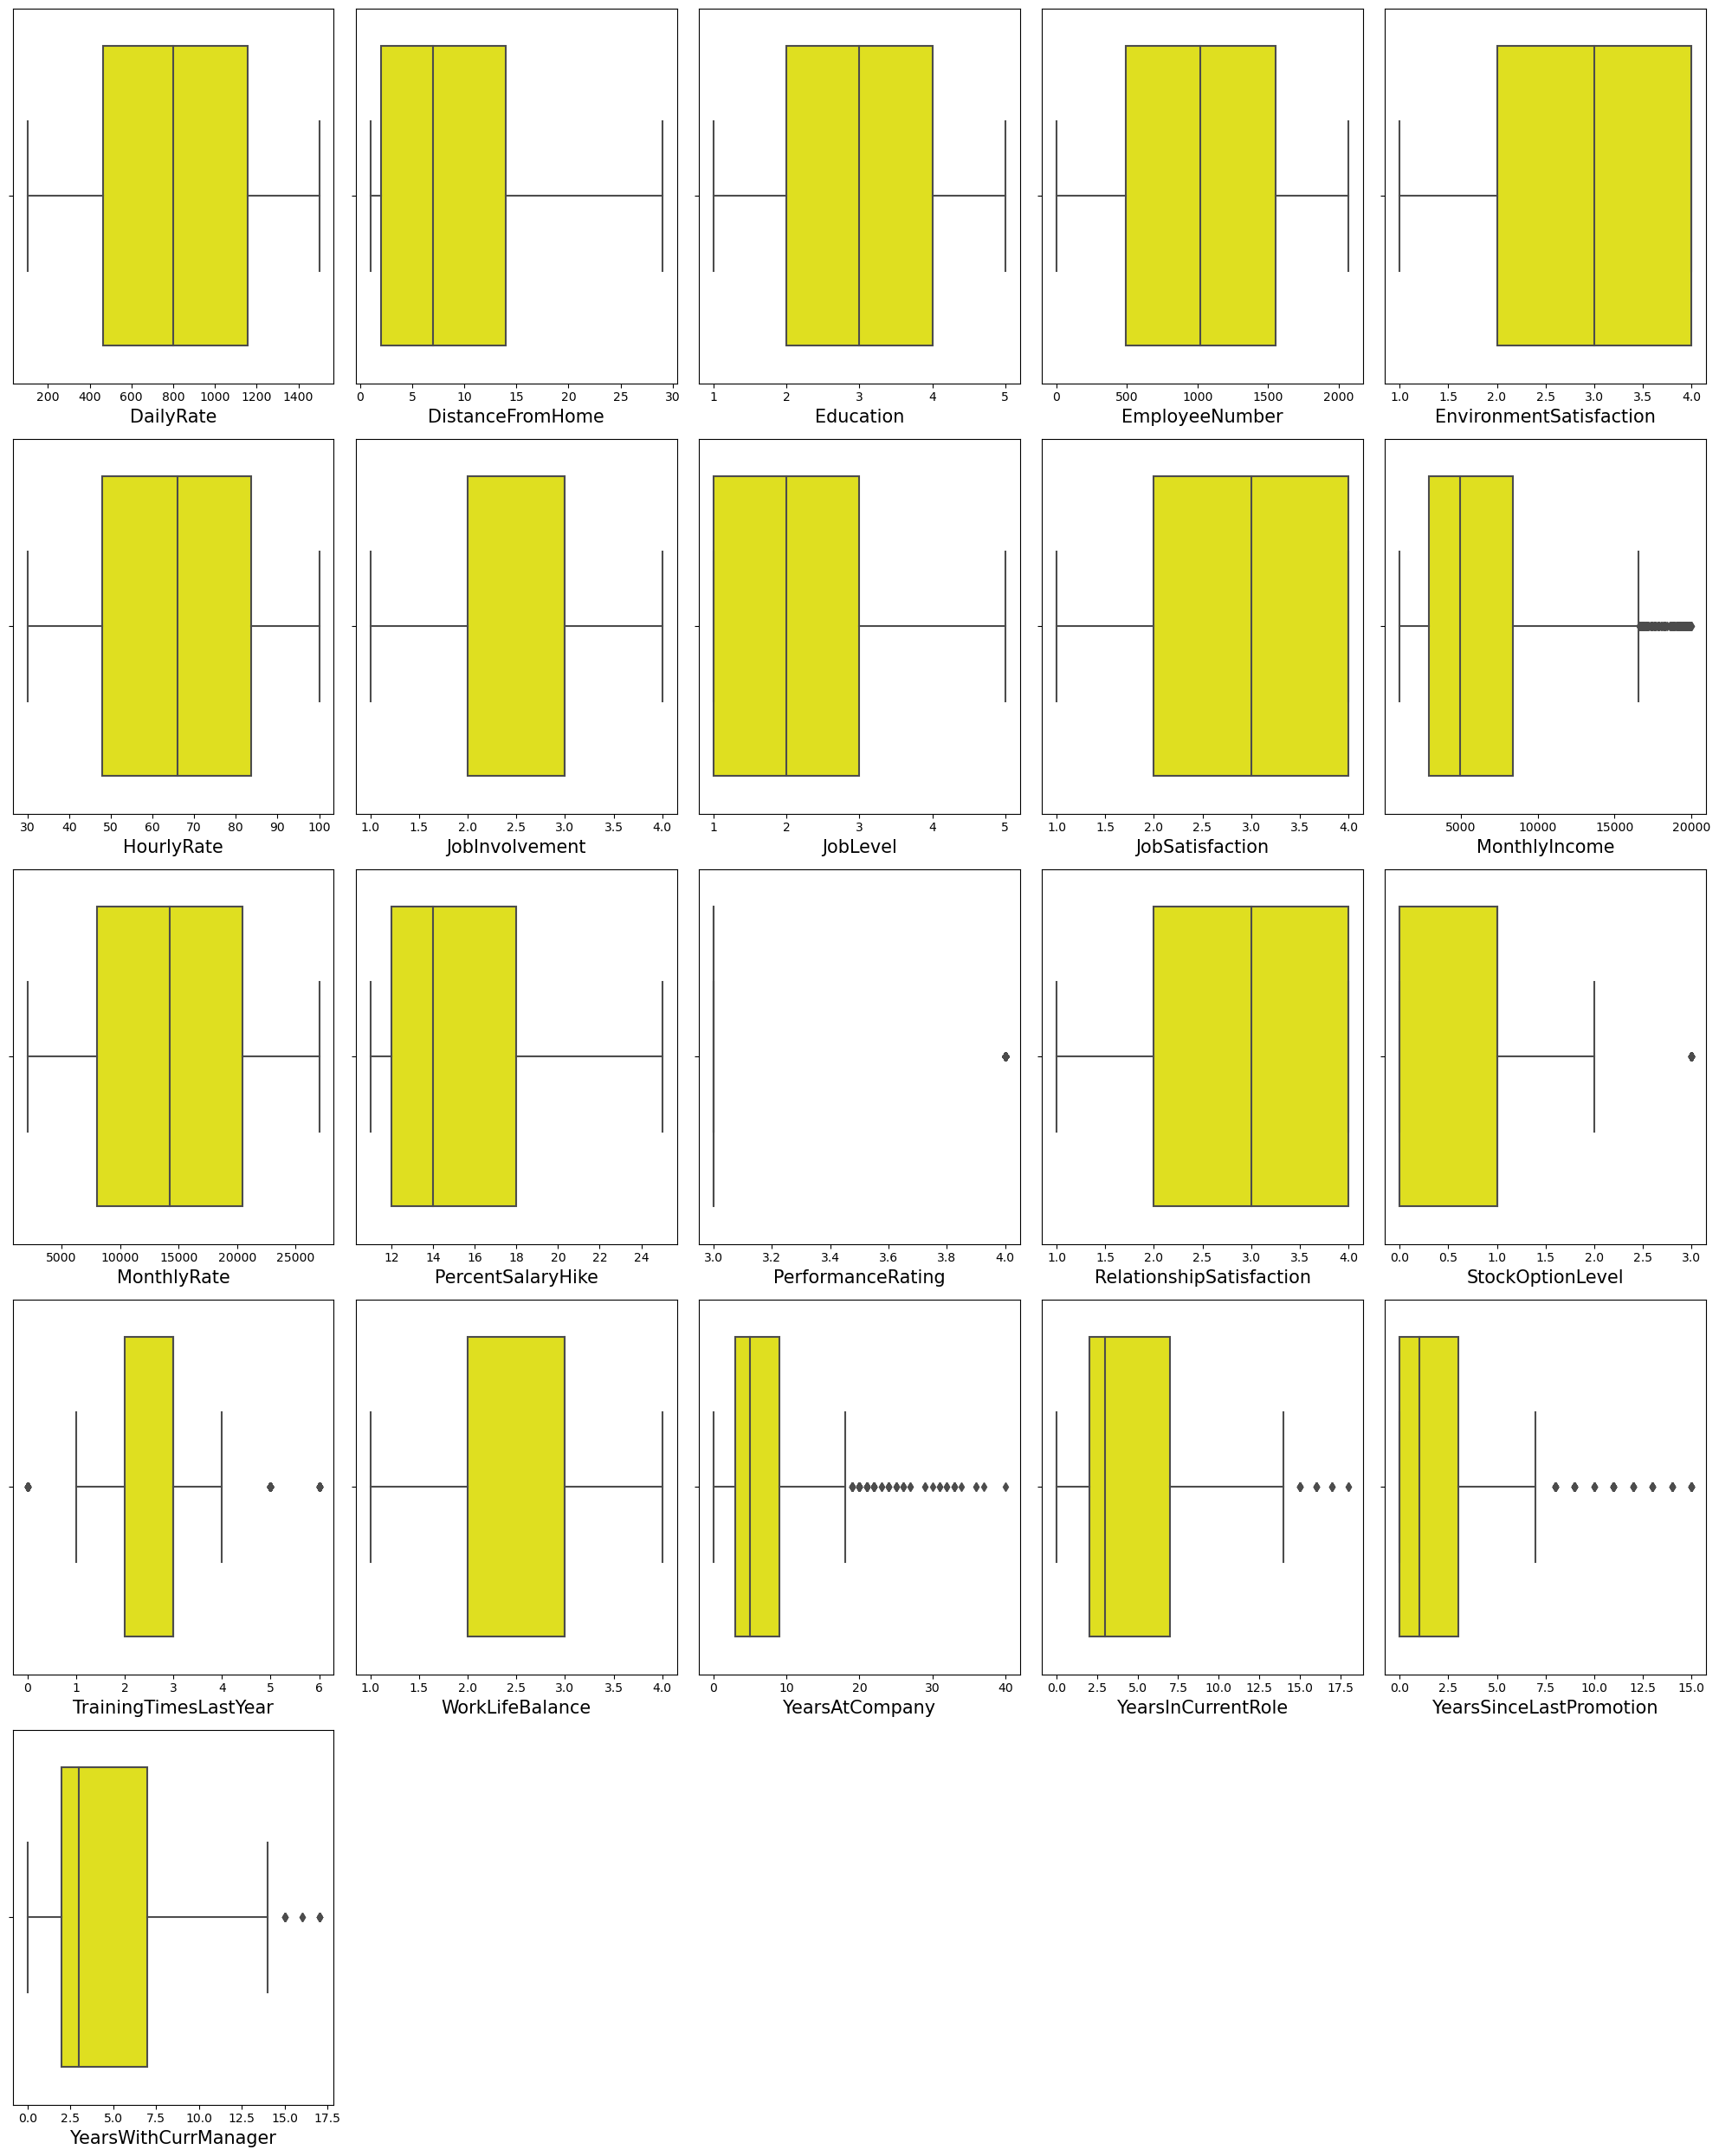

In [84]:
#Detecting Outliers
plt.figure (figsize=(20,25))
p=1
for i in num_col:
    if p<=25:
        plt.subplot(5,5,p)
        sns.boxplot(df[i],color='yellow')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()        

We can see there are outliers present in some columns. Lets remove them for a clean dataset.

In [85]:
#Removing outliers using zscore
from scipy.stats import zscore
outliers=df[['MonthlyIncome','StockOptionLevel','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
            'YearsSinceLastPromotion','YearsWithCurrManager']]
z=np.abs(zscore(outliers))
z

,MonthlyIncome,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.108350,0.932014,2.171982,0.164613,0.063296,0.679146,0.245834
1,0.291719,0.241988,0.155707,0.488508,0.764998,0.368715,0.806541
2,0.937654,0.932014,0.155707,1.144294,1.167687,0.679146,1.155935
3,0.763634,0.932014,0.155707,0.161947,0.764998,0.252146,1.155935
4,0.644858,0.241988,0.155707,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...
1465,0.835451,0.241988,0.155707,0.327893,0.615492,0.679146,0.314873
1466,0.741140,0.241988,1.707500,0.001333,0.764998,0.368715,0.806541
1467,0.076690,0.241988,2.171982,0.164613,0.615492,0.679146,0.314873
1468,0.236474,0.932014,0.155707,0.325228,0.488900,0.679146,1.086895


In [86]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   98,  110,  123,  123,  123,
        126,  126,  153,  178,  187,  190,  190,  218,  231,  231,  237,
        237,  270,  281,  326,  386,  386,  411,  425,  425,  427,  466,
        473,  477,  535,  561,  561,  584,  592,  595,  595,  616,  635,
        653,  653,  677,  686,  701,  716,  746,  749,  752,  799,  838,
        861,  861,  875,  875,  914,  914,  918,  922,  926,  926,  937,
        962,  976,  976, 1008, 1024, 1078, 1078, 1086, 1086, 1093, 1111,
       1116, 1135, 1138, 1138, 1156, 1221, 1223, 1242, 1295, 1301, 1303,
       1327, 1331, 1348, 1351, 1414, 1430], dtype=int64), array([6, 5, 3, 5, 4, 5, 3, 5, 4, 5, 6, 3, 5, 6, 5, 6, 3, 4, 5, 4, 6, 3,
       5, 3, 4, 5, 5, 6, 3, 3, 5, 5, 4, 3, 3, 5, 3, 6, 5, 3, 3, 5, 6, 6,
       3, 5, 3, 6, 5, 4, 4, 3, 5, 5, 5, 3, 5, 5, 6, 3, 5, 3, 5, 5, 6, 5,
       3, 4, 5, 5, 4, 5, 6, 3, 5, 5, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 6, 4, 5, 4], dtype=int64))


In [87]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,11,3,1,0,0,1,6,4,0,5
1,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,4,1,3,3,10,7,1,7
2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,15,3,2,0,3,3,0,0,0,0
3,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,3,0,3,3,8,7,3,0
4,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,12,3,4,1,3,3,2,2,2,2


In [88]:
df_new.shape

(1396, 29)

In [89]:
df.shape

(1470, 29)

In [90]:
#Let's check the data loss for proceeding further
print("The data loss after removing outliers is:",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

The data loss after removing outliers is: 5.034013605442176


Here as the data loss is only 5.03%, so we can proceed with the new dataset obtained after removing outliers.

In [91]:
df=df_new
df.shape

(1396, 29)

# Skewness

In [92]:
df.skew()

DailyRate                  -0.014303
DistanceFromHome            0.952837
Education                  -0.285071
EmployeeNumber              0.017699
EnvironmentSatisfaction    -0.326665
HourlyRate                 -0.035303
JobInvolvement             -0.499939
JobLevel                    1.111050
JobSatisfaction            -0.342818
MonthlyIncome               1.523259
MonthlyRate                 0.024414
PercentSalaryHike           0.802333
PerformanceRating           1.926756
RelationshipSatisfaction   -0.293009
StockOptionLevel            0.966230
TrainingTimesLastYear       0.570265
WorkLifeBalance            -0.556307
YearsAtCompany              1.241290
YearsInCurrentRole          0.715539
YearsSinceLastPromotion     1.736085
YearsWithCurrManager        0.683821
dtype: float64

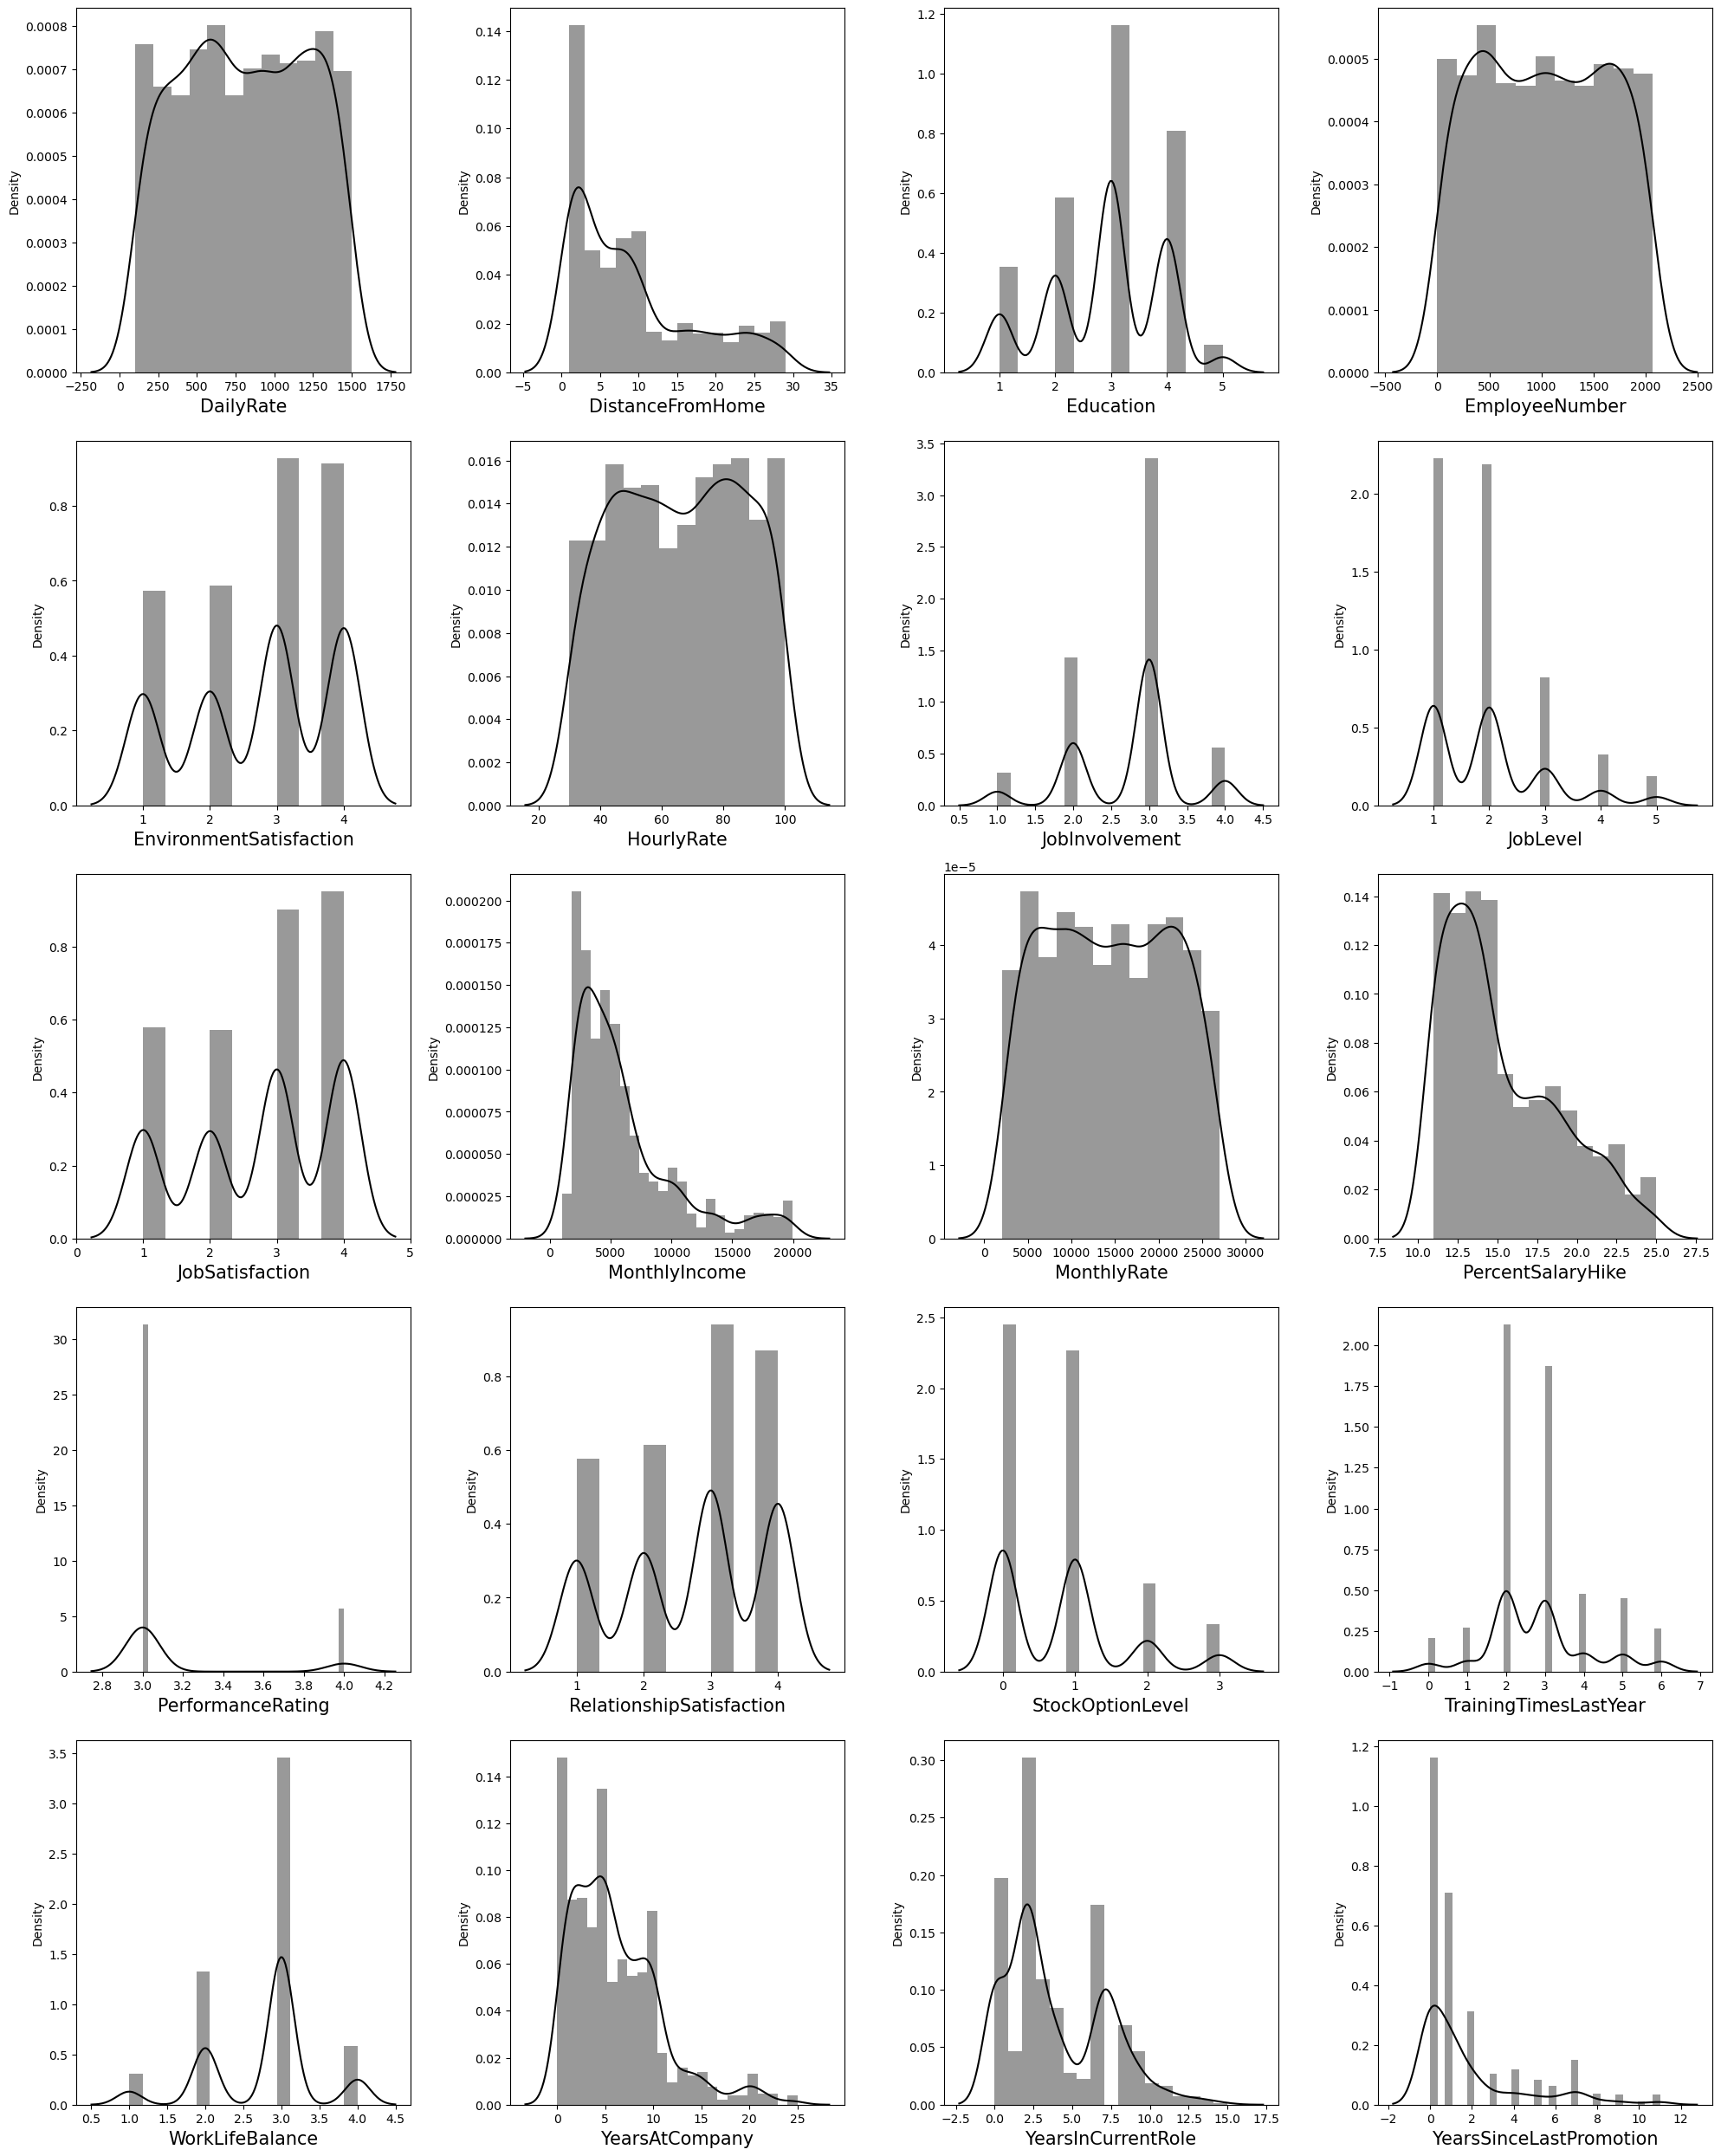

In [93]:
#Visulaizing the skewness present
#As we do not remove skewness if any from categorical columns, lets proceed with numerical column
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=20:
        plt.subplot(5,4,p)
        sns.distplot(df[i],color='black')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

We can see there is skewness present.

In [94]:
#Removing skewness
from scipy.stats import boxcox
skewed=df[['PerformanceRating','PercentSalaryHike','MonthlyIncome','JobInvolvement','DistanceFromHome']]
for i in skewed:
    df[i]=boxcox(df[i],0)
df.skew()

DailyRate                  -0.014303
DistanceFromHome           -0.249540
Education                  -0.285071
EmployeeNumber              0.017699
EnvironmentSatisfaction    -0.326665
HourlyRate                 -0.035303
JobInvolvement             -1.477560
JobLevel                    1.111050
JobSatisfaction            -0.342818
MonthlyIncome               0.317204
MonthlyRate                 0.024414
PercentSalaryHike           0.478100
PerformanceRating           1.926756
RelationshipSatisfaction   -0.293009
StockOptionLevel            0.966230
TrainingTimesLastYear       0.570265
WorkLifeBalance            -0.556307
YearsAtCompany              1.241290
YearsInCurrentRole          0.715539
YearsSinceLastPromotion     1.736085
YearsWithCurrManager        0.683821
dtype: float64

In [95]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,1102,Sales,0.000000,2,Life Sciences,1,2,Female,...,2.397895,1.098612,1,0,0,1,6,4,0,5
1,No,Travel_Frequently,279,Research & Development,2.079442,1,Life Sciences,2,3,Male,...,3.135494,1.386294,4,1,3,3,10,7,1,7
2,Yes,Travel_Rarely,1373,Research & Development,0.693147,2,Other,4,4,Male,...,2.708050,1.098612,2,0,3,3,0,0,0,0
3,No,Travel_Frequently,1392,Research & Development,1.098612,4,Life Sciences,5,4,Female,...,2.397895,1.098612,3,0,3,3,8,7,3,0
4,No,Travel_Rarely,591,Research & Development,0.693147,1,Medical,7,1,Male,...,2.484907,1.098612,4,1,3,3,2,2,2,2


In [96]:
df.skew()

DailyRate                  -0.014303
DistanceFromHome           -0.249540
Education                  -0.285071
EmployeeNumber              0.017699
EnvironmentSatisfaction    -0.326665
HourlyRate                 -0.035303
JobInvolvement             -1.477560
JobLevel                    1.111050
JobSatisfaction            -0.342818
MonthlyIncome               0.317204
MonthlyRate                 0.024414
PercentSalaryHike           0.478100
PerformanceRating           1.926756
RelationshipSatisfaction   -0.293009
StockOptionLevel            0.966230
TrainingTimesLastYear       0.570265
WorkLifeBalance            -0.556307
YearsAtCompany              1.241290
YearsInCurrentRole          0.715539
YearsSinceLastPromotion     1.736085
YearsWithCurrManager        0.683821
dtype: float64

In [97]:
#Separating the target and feature variable
y=df.iloc[:,0]
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [98]:
x=df.iloc[:,2:]
x.head()

,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1102,Sales,0.000000,2,Life Sciences,1,2,Female,94,1.098612,...,2.397895,1.098612,1,0,0,1,6,4,0,5
1,279,Research & Development,2.079442,1,Life Sciences,2,3,Male,61,0.693147,...,3.135494,1.386294,4,1,3,3,10,7,1,7
2,1373,Research & Development,0.693147,2,Other,4,4,Male,92,0.693147,...,2.708050,1.098612,2,0,3,3,0,0,0,0
3,1392,Research & Development,1.098612,4,Life Sciences,5,4,Female,56,1.098612,...,2.397895,1.098612,3,0,3,3,8,7,3,0
4,591,Research & Development,0.693147,1,Medical,7,1,Male,40,1.098612,...,2.484907,1.098612,4,1,3,3,2,2,2,2


In [99]:
y.value_counts()

No     1167
Yes     229
Name: Attrition, dtype: int64

# Encoding

In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=x[['Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']]
for i in list:
    x[i]=le.fit_transform(x[i])
x.head()

,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1102,2,0.000000,2,1,1,2,0,94,1.098612,...,2.397895,1.098612,1,0,0,1,6,4,0,5
1,279,1,2.079442,1,1,2,3,1,61,0.693147,...,3.135494,1.386294,4,1,3,3,10,7,1,7
2,1373,1,0.693147,2,4,4,4,1,92,0.693147,...,2.708050,1.098612,2,0,3,3,0,0,0,0
3,1392,1,1.098612,4,1,5,4,0,56,1.098612,...,2.397895,1.098612,3,0,3,3,8,7,3,0
4,591,1,0.693147,1,3,7,1,1,40,1.098612,...,2.484907,1.098612,4,1,3,3,2,2,2,2


In [101]:
#Checking multi-collinaerity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,5.125762,DailyRate
1,13.334322,Department
2,3.750027,DistanceFromHome
3,9.273798,Education
4,3.913646,EducationField
5,3.990861,EmployeeNumber
6,7.259077,EnvironmentSatisfaction
7,2.557584,Gender
8,11.674662,HourlyRate
9,10.407617,JobInvolvement


As we can see certain columns are having high multi-collineraity, lets drop these columns

In [ ]:
x.drop(['MonthlyIncome','PercentSalaryHike','PerformanceRating','Department','HourlyRate','WorkLifeBalance','YearsAtCompany'],axis=1,inplace=True)

In [105]:
print(x.shape)
x.head()

(1396, 20)


,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,OverTime,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1102,0.000000,2,1,1,2,0,1.098612,2,7,4,2,19479,1,1,0,0,4,0,5
1,279,2.079442,1,1,2,3,1,0.693147,2,6,2,1,24907,0,4,1,3,7,1,7
2,1373,0.693147,2,4,4,4,1,0.693147,1,2,3,2,2396,1,2,0,3,0,0,0
3,1392,1.098612,4,1,5,4,0,1.098612,1,6,3,1,23159,1,3,0,3,7,3,0
4,591,0.693147,1,3,7,1,1,1.098612,1,2,2,1,16632,0,4,1,3,2,2,2


In [106]:
#checking if the dataset is balanced or imbalanced
y.value_counts()

No     1167
Yes     229
Name: Attrition, dtype: int64

As we can see this is highly imbalanced.

In [107]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)
y.value_counts()

Yes    1167
No     1167
Name: Attrition, dtype: int64

Now we can say our dataset is balanced.

# Modelling

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [111]:
#finding the best random_state
max_acc=0
max_RS=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_acc:
        max_acc=score
        max_RS=i
print("Maximum score achieved at",max_RS,"is",max_acc)

Maximum score achieved at 96 is 0.9486081370449678


In [112]:
#creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1867, 20)
(467, 20)
(1867,)
(467,)


In [115]:
#importing necessary algos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [117]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,rfc_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,rfc_pred))
print("Classification Report\n",classification_report(y_test,rfc_pred))

Accuracy Score = 0.9379014989293362
Confusion Matrix
 [[206  15]
 [ 14 232]]
Classification Report
               precision    recall  f1-score   support

          No       0.94      0.93      0.93       221
         Yes       0.94      0.94      0.94       246

    accuracy                           0.94       467
   macro avg       0.94      0.94      0.94       467
weighted avg       0.94      0.94      0.94       467



In [118]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,dtc_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,dtc_pred))
print("Classification Report\n",classification_report(y_test,dtc_pred))

Accuracy Score = 0.841541755888651
Confusion Matrix
 [[180  41]
 [ 33 213]]
Classification Report
               precision    recall  f1-score   support

          No       0.85      0.81      0.83       221
         Yes       0.84      0.87      0.85       246

    accuracy                           0.84       467
   macro avg       0.84      0.84      0.84       467
weighted avg       0.84      0.84      0.84       467



In [119]:
sv=SVC()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,sv_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,sv_pred))
print("Classification Report\n",classification_report(y_test,sv_pred))

Accuracy Score = 0.4689507494646681
Confusion Matrix
 [[156  65]
 [183  63]]
Classification Report
               precision    recall  f1-score   support

          No       0.46      0.71      0.56       221
         Yes       0.49      0.26      0.34       246

    accuracy                           0.47       467
   macro avg       0.48      0.48      0.45       467
weighted avg       0.48      0.47      0.44       467



In [120]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred=ab.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,ab_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,ab_pred))
print("Classification Report\n",classification_report(y_test,ab_pred))

Accuracy Score = 0.880085653104925
Confusion Matrix
 [[191  30]
 [ 26 220]]
Classification Report
               precision    recall  f1-score   support

          No       0.88      0.86      0.87       221
         Yes       0.88      0.89      0.89       246

    accuracy                           0.88       467
   macro avg       0.88      0.88      0.88       467
weighted avg       0.88      0.88      0.88       467



In [121]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,lr_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,lr_pred))
print("Classification Report\n",classification_report(y_test,lr_pred))

Accuracy Score = 0.7066381156316917
Confusion Matrix
 [[166  55]
 [ 82 164]]
Classification Report
               precision    recall  f1-score   support

          No       0.67      0.75      0.71       221
         Yes       0.75      0.67      0.71       246

    accuracy                           0.71       467
   macro avg       0.71      0.71      0.71       467
weighted avg       0.71      0.71      0.71       467



# Cross_Validation

In [122]:
from sklearn.model_selection import cross_val_score

In [125]:
#finding the best k-fold value
for i in range(2,20):
    score=cross_val_score(dtc,x,y,cv=i)
    print('At K-Fold',i)
    print('CV Score of model is',score.mean())
    print('Accuracy Score for model is',accuracy_score(y_test,dtc_pred))
    print('\n')

At K-Fold 2
CV Score of model is 0.4473007712082262
Accuracy Score for model is 0.841541755888651


At K-Fold 3
CV Score of model is 0.5252784918594687
Accuracy Score for model is 0.841541755888651


At K-Fold 4
CV Score of model is 0.6041385194670927
Accuracy Score for model is 0.841541755888651


At K-Fold 5
CV Score of model is 0.6374750714541728
Accuracy Score for model is 0.841541755888651


At K-Fold 6
CV Score of model is 0.6812339331619538
Accuracy Score for model is 0.841541755888651


At K-Fold 7
CV Score of model is 0.7579422878824076
Accuracy Score for model is 0.841541755888651


At K-Fold 8
CV Score of model is 0.7604402038318505
Accuracy Score for model is 0.841541755888651


At K-Fold 9
CV Score of model is 0.772959772959773
Accuracy Score for model is 0.841541755888651


At K-Fold 10
CV Score of model is 0.7760115182861963
Accuracy Score for model is 0.841541755888651


At K-Fold 11
CV Score of model is 0.7820525209576499
Accuracy Score for model is 0.841541755888651



Here we can see maximum score is at k-fold 19, so lets proceed with this k-fold value.

In [127]:
dtc_score=cross_val_score(dtc,x,y,cv=19)
print(dtc_score)
print(dtc_score.mean())
print("The difference between cv_score and accuracy is :",(accuracy_score(y_test,dtc_pred))-dtc_score.mean())

[0.60162602 0.63414634 0.71544715 0.65853659 0.87804878 0.88617886
 0.77235772 0.89430894 0.83739837 0.83739837 0.84552846 0.82113821
 0.87804878 0.88617886 0.80487805 0.81300813 0.80327869 0.82786885
 0.69672131]
0.7943208681439704
The difference between cv_score and accuracy is : 0.047220887744680584


In [128]:
rfc_score=cross_val_score(rfc,x,y,cv=19)
print(rfc_score)
print(rfc_score.mean())
print("The difference between cv_score and accuracy is :",(accuracy_score(y_test,rfc_pred))-rfc_score.mean())

[0.74796748 0.70731707 0.70731707 0.7398374  0.95121951 0.97560976
 0.94308943 0.94308943 0.90243902 0.95934959 0.96747967 0.91869919
 0.95934959 0.96747967 0.95121951 0.95121951 0.95081967 0.95081967
 0.97540984]
0.9036701109030073
The difference between cv_score and accuracy is : 0.03423138802632886


Here we can see the least difference achieved is through RandomForestClassifier(rfc) model.

# Hyper-Parameter Tuning

In [129]:
from sklearn.model_selection import GridSearchCV

In [133]:
model=RandomForestClassifier()
parameters={'n_estimators':[120,150,200,260,320,321],'criterion':['gini','entropy','log_loss']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

SCORE = 0.7873918997160214
{'criterion': 'gini', 'n_estimators': 120}


In [134]:
#Applying the best params on the model
rfc=RandomForestClassifier(criterion='gini',n_estimators=120)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report\n",classification_report(y_test,pred))

Accuracy Score = 0.9421841541755889
Confusion Matrix
 [[208  13]
 [ 14 232]]
Classification Report
               precision    recall  f1-score   support

          No       0.94      0.94      0.94       221
         Yes       0.95      0.94      0.95       246

    accuracy                           0.94       467
   macro avg       0.94      0.94      0.94       467
weighted avg       0.94      0.94      0.94       467



In [136]:
final_model=rfc
final_model

RandomForestClassifier(n_estimators=120)

# Saving best model

In [141]:
import joblib
joblib.dump(final_model,"HR_Attrition.pkl")

['HR_Attrition.pkl']

In [142]:
#Prediction from saved model
model=joblib.load("HR_Attrition.pkl")
pred=model.predict(x_test)
pred

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Ye

In [143]:
actual=np.array(y_test)
ds=pd.DataFrame({"Actual Value":actual,"Predicted Value":pred})
ds

,Actual Value,Predicted Value
0,Yes,Yes
1,Yes,Yes
2,No,No
3,No,No
4,No,No
...,...,...
462,Yes,Yes
463,Yes,Yes
464,No,No
465,Yes,Yes


Here we can see our model is performing very well.